In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
x = np.random.uniform(0.1, 10, 1000)

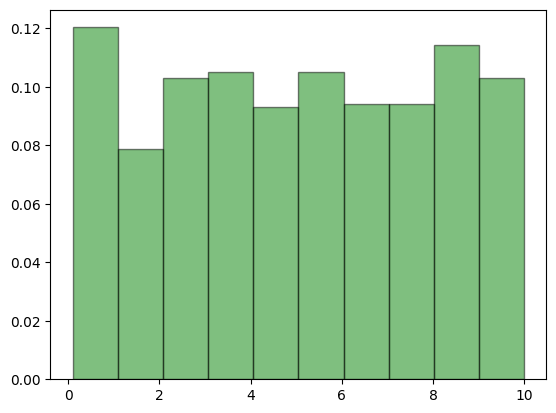

In [11]:
counts, bins, _ = plt.hist(x, bins='scott', density=True, alpha=0.5, color='g', edgecolor='black')

In [12]:
y = np.sqrt(x)

In [13]:
def p(y):
    return 1/9.9 * 2*y

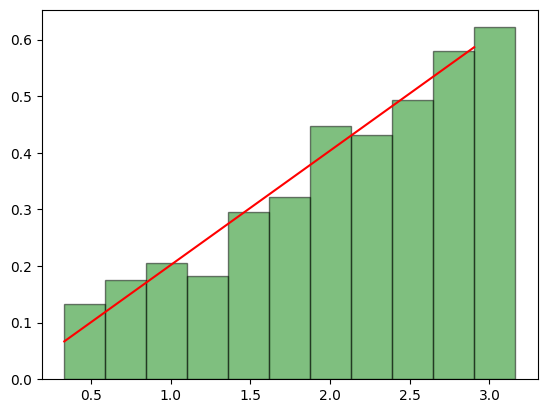

In [14]:
c, b, _ = plt.hist(y, bins='scott', density=True, alpha=0.5, color='g', edgecolor='black')
plt.plot(b[:-1], p(b[:-1]), color='red', label='Theoretical PDF')

In [15]:
np.log(x).mean() - y.mean()

np.float64(-0.796893653430206)

In [16]:
np.median(np.log10(x)) - np.median(y)

np.float64(-1.550521885339082)

In [301]:
mu = 0
sigma = 0.5

In [302]:
x = np.random.normal(mu, sigma, int(1e5))

In [312]:
Q = []
N = 10
for _ in range(100):
    idx = np.random.choice(len(x), size=N, replace=False)
    x_sample = x[idx]
    z = (1/sigma) * (x_sample - mu)
    Q.append(np.sum(z**2))

In [313]:
Q = np.array(Q)

In [314]:
from scipy.special import gamma

def chi2(Q):
    return (1/(2**(N/2) * gamma(N/2))) * (Q**((N/2)-1)) * np.exp(-Q/2)

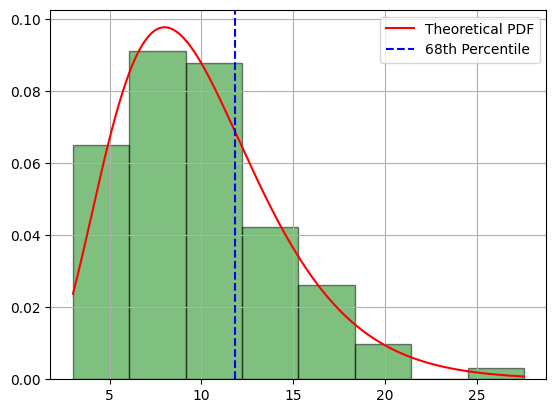

In [337]:
c2, b2, _ = plt.hist(Q, bins='scott', density=True, alpha=0.5, color='g', edgecolor='black')
plt.plot(np.linspace(min(Q),max(Q),1000), chi2(np.linspace(min(Q),max(Q),1000)), color='red', label='Theoretical PDF')
xp = np.percentile(Q, 68)
plt.axvline(xp, color='blue', linestyle='--', label='68th Percentile')
plt.legend()
plt.grid()

In [327]:
chi2(b2[b2 > xp])

array([0.06443056, 0.03400425, 0.01522201, 0.00608328, 0.00223756,
       0.00077253])